E3 = Eout =:
[[0.70710678+0.j        ]
 [0.70699909-0.01234071j]]

Absolute of x of Eout:
0.7071067811865477

Real of x of Eout:
0.7071067811865477

Phase of x of Eout:
0.0

Absolute of y of Eout:
0.7071067811865478

Real of y of Eout:
0.7069990853988244

Phase of y of Eout:
-0.9999999999999959

Length of PX_qwpcol = 
8192

Length of X1 = 
8192

X1 = 
[4108.23028416-0.j           12.24364441+0.6917505j
   12.28306951+1.39380274j ...   12.34631056-2.11723628j
   12.28306951-1.39380274j   12.24364441-0.6917505j ]

Length of Shifted_X1 = 
8192

Length of Shifted_f = 
8192

arangen = 
[   0    1    2 ... 8189 8190 8191]

xyz_init =
[[0. ]
 [1.1]
 [0. ]]
xyz_end =
[[ 0.77769899]
 [-0.77769899]
 [ 0.01919765]]


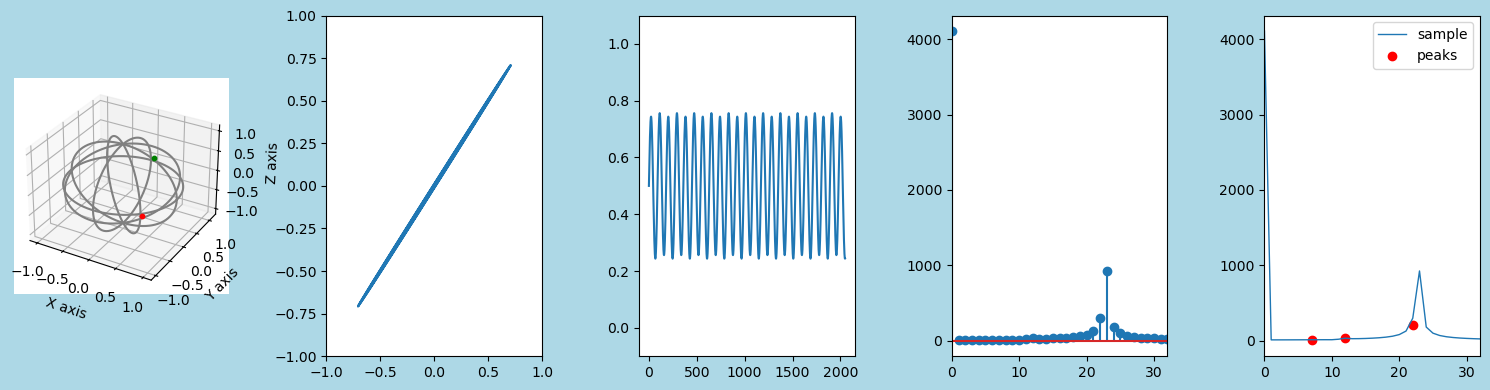

In [6]:
import os
import numpy as np
from scipy.fft import fft, fftshift
from scipy import signal
import matplotlib.pyplot as plt
import Polarimeter_def
import Sphere_def


def findpeaks(x, y, n, w):
    index_all = list(signal.argrelmax(y, order=w))                  
    index = []                                                      
    peaks = []                                                      
 
    for i in range(n):
        index.append(index_all[0][i])
        peaks.append(y[index_all[0][i]])
    index = np.array(index) * x[1]                                 
    return index, peaks



if __name__ == "__main__":
    
    Ein = np.array([[1],[0]])
    #Ein = np.array([[0],[1]])

E1 = Ein

#Waveplate

theta2 = 45 # constant
phase2 = 179 # Phase retardance in degree. 90 for QWP. 180 for HWP

E2 = Polarimeter_def.waveplate(phase2,theta2,E1)

#Faraday Rotation

theta_fr = 45

E3 = Polarimeter_def.faradayrotaor(theta_fr,E2)

Eout = E3

print('E3 = Eout =:')
print(Eout)
print('')


xabsEout = np.abs(Eout[0,0])
xrealEout = np.real(Eout[0,0])
xphaseEout = np.angle(Eout[0,0], deg=True)

print('Absolute of x of Eout:')
print(xabsEout)
print('')

print('Real of x of Eout:')
print(xrealEout)
print('')


print('Phase of x of Eout:')
print(xphaseEout)
print('')

yabsEout = np.abs(Eout[1,0])
yrealEout = np.real(Eout[1,0])
yphaseEout = np.angle(Eout[1,0], deg=True)


print('Absolute of y of Eout:')
print(yabsEout)
print('')

print('Real of y of Eout:')
print(yrealEout)
print('')


print('Phase of y of Eout:')
print(yphaseEout)
print('')

m = 256

Eoutx_col = np.zeros(m)
Eouty_col = np.zeros(m)

dirname = "png/"
os.makedirs(dirname, exist_ok=True)


for ii in range(m):

    opl1 = 0.05 * ii

    Eout_propagate = Polarimeter_def.propagate(opl1,Eout)

    Eoutx_col[ii] = np.real(Eout_propagate[0,0])   
    Eouty_col[ii] = np.real(Eout_propagate[1,0])


#n = 2048
n = 4096*2
thetacol = np.zeros(n)
PX_qwpcol = np.zeros(n)


# Simulate rotating QWP

phase_qwp = 90 # degree. 90: QWP


for jj in range(n):
    
    theta_var = 0.25 * jj

    Eout_qwp = Polarimeter_def.waveplate(phase_qwp, theta_var, Eout)
    
    thetacol[jj] = theta_var
    PX_qwpcol[jj] = (np.abs(Eout_qwp[0,0]))**2 # Linear Polarization Component



len_PX_qwpcol = len(PX_qwpcol)
print('Length of PX_qwpcol = ')
print(len_PX_qwpcol)
print('')

X1 = fft(PX_qwpcol)
lenX1 = len(X1)

print('Length of X1 = ')
print(lenX1)
print('')

df = 1/lenX1

Shifted_X1 = fftshift(X1)
print('X1 = ')
print(X1)
print('')


len_Shifted_X1 = len(Shifted_X1)

print('Length of Shifted_X1 = ')
print(len_Shifted_X1)
print('')


Shifted_sampleIndex = np.arange(-lenX1//2, lenX1//2)

Shifted_f = Shifted_sampleIndex*df

len_Shifted_f = len(Shifted_f)

print('Length of Shifted_f = ')
print(len_Shifted_f)
print('')

arangen = np.arange(lenX1)

print('arangen = ')
print(arangen)
print('')

C0 = Sphere_def.Sphere0()
C45 = Sphere_def.Sphere45()
C90 = Sphere_def.Sphere90()
C135 = Sphere_def.Sphere135()
H0 = Sphere_def.SphereH0()






value_in_YZplane = phase2 # YZ Plane
value_in_XYplane = theta_fr # XY Plane

xyz_init = np.zeros((3, 1))

xyz_init[1,:] = 1.1

print("xyz_init =")
print(xyz_init)

# rotate_Phi

x1 = xyz_init[0,:]
y1 = xyz_init[1,:]
z1 = xyz_init[2,:]

x2 = x1
y2 = np.cos(value_in_YZplane*np.pi/180)*y1 - np.sin(value_in_YZplane*np.pi/180)*z1
z2 = np.sin(value_in_YZplane*np.pi/180)*y1 + np.cos(value_in_YZplane*np.pi/180)*z1

#rotate_tho

x3 = np.cos(value_in_XYplane*np.pi/180)*x2 - np.sin(value_in_XYplane*np.pi/180)*y2
y3 = np.sin(value_in_XYplane*np.pi/180)*x2 + np.cos(value_in_XYplane*np.pi/180)*y2
z3 = z2

xyz_end = np.zeros((3, 1))

xyz_end[0,:] = x3
xyz_end[1,:] = y3
xyz_end[2,:] = z3

print("xyz_end =")
print(xyz_end)


fig = plt.figure(figsize = (15,4), tight_layout=True, facecolor='lightblue')

ax21 = fig.add_subplot(1, 5, 1,projection='3d')
ax1 = fig.add_subplot(1, 5, 2)
ax2 = fig.add_subplot(1, 5, 3)
ax3 = fig.add_subplot(1, 5, 4)
ax4 = fig.add_subplot(1, 5, 5)


ax21.plot(C0[0,:], C0[1,:], C0[2,:], color='gray')
ax21.plot(C45[0,:], C45[1,:], C45[2,:], color='gray')
ax21.plot(C90[0,:], C90[1,:], C90[2,:], color='gray')
ax21.plot(C135[0,:], C135[1,:], C135[2,:], color='gray')

ax21.plot(H0[0,:], H0[1,:], H0[2,:], color='gray')

ax21.scatter(xyz_init[0,:], xyz_init[1,:], xyz_init[2,:], color='green', s=10)
ax21.scatter(xyz_end[0,:], xyz_end[1,:], xyz_end[2,:], color='red', s=10)

ax21.set_xlabel('X axis')
ax21.set_ylabel('Y axis')
ax21.set_zlabel('Z axis')

ax1.plot(Eoutx_col, Eouty_col)
ax1.set_xlim(-1,1)
ax1.set_ylim(-1,1)

ax2.plot(thetacol,PX_qwpcol, "-")
ax2.set_ylim(-0.1,1.1)


#ax3.stem(Shifted_f, np.abs(Shifted_X1)/N, use_line_collection=True)

ax3.stem(arangen, np.abs(X1))

#ax3.stem(freq, np.abs(X1), 'b', markerfmt=" ", basefmt="-b")
ax3.set_xlim(0,32)

#ax3.plot(Shifted_f, np.abs(Shifted_X1)/o)#, use_line_collection=True)

# Assume this light hits rotating qwp and fixed polarizer.

index, peaks = findpeaks(arangen, X1, 4, 2)

ax4.plot(arangen, np.abs(X1),label='sample', lw=1)
ax4.scatter(index, peaks, label='peaks', color='red')
ax4.legend()
ax4.set_xlim(0,32)

filename = dirname + f"{phase2}_{theta_fr}.png"
plt.savefig(filename, dpi=300)

plt.show()